In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Employee_Salary_Dataset.csv",header=0,names=["DATE","TAG","POSTS"])

In [4]:
df

,,DATE,TAG,POSTS
1,5,28,Female,250000
2,1,21,Male,50000
3,3,23,Female,170000
4,2,22,Male,25000
5,1,17,Male,10000
6,25,62,Male,5001000
7,19,54,Female,800000
8,2,21,Female,9000
9,10,36,Female,61500
10,15,54,Female,650000


In [5]:
df.head()

,,DATE,TAG,POSTS
1,5,28,Female,250000
2,1,21,Male,50000
3,3,23,Female,170000
4,2,22,Male,25000
5,1,17,Male,10000


In [6]:
df.tail()

,,DATE,TAG,POSTS
31,10,34,Male,80000
32,15,54,Male,900000
33,20,55,Female,1540000
34,19,53,Female,9300000
35,16,49,Male,7600000


In [7]:
df.count()

DATE     35
TAG      35
POSTS    35
dtype: int64

In [8]:
df.groupby("TAG").sum(numeric_only=True)


,DATE,POSTS
TAG,,
Female,668,36988500
Male,574,35081650


In [9]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
Female,18,18
Male,17,17


In [10]:
df.shape

(35, 3)

In [11]:
df.DATE

1   5     28
2   1     21
3   3     23
4   2     22
5   1     17
6   25    62
7   19    54
8   2     21
9   10    36
10  15    54
11  4     26
12  6     29
13  14    39
14  11    40
15  2     23
16  4     27
17  10    34
18  15    54
19  2     21
20  10    36
21  15    54
22  4     26
23  5     29
24  1     21
25  4     23
26  3     22
27  1     18
28  27    62
29  19    54
30  2     21
31  10    34
32  15    54
33  20    55
34  19    53
35  16    49
Name: DATE, dtype: int64

In [13]:
print(df.columns)


Index(['DATE', 'TAG', 'POSTS'], dtype='object')


In [14]:
df.iloc[0]  # entire first row


DATE         28
TAG      Female
POSTS    250000
Name: (1, 5), dtype: object

In [17]:
df.columns = df.columns.str.strip().str.upper()
print(df.columns)


Index(['DATE', 'TAG', 'POSTS'], dtype='object')


In [18]:
type(df['DATE'].iloc[0])


numpy.int64

In [19]:
df.DATE[1]


5    28
Name: DATE, dtype: int64

In [20]:
df.DATE=pd.to_datetime(df.DATE)

In [21]:
type(df.DATE[1])

pandas.core.series.Series

In [22]:
df.head()

,,DATE,TAG,POSTS
1,5,1970-01-01 00:00:00.000000028,Female,250000
2,1,1970-01-01 00:00:00.000000021,Male,50000
3,3,1970-01-01 00:00:00.000000023,Female,170000
4,2,1970-01-01 00:00:00.000000022,Male,25000
5,1,1970-01-01 00:00:00.000000017,Male,10000


In [24]:
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', aggfunc='sum')


In [25]:
reshaped_df.reset_index(inplace=True)
reshaped_df.head()



TAG,DATE,Female,Male
0,1970-01-01 00:00:00.000000017,NaN,10000.0
1,1970-01-01 00:00:00.000000018,NaN,3000.0
2,1970-01-01 00:00:00.000000021,21100.0,65000.0
3,1970-01-01 00:00:00.000000022,20000.0,25000.0
4,1970-01-01 00:00:00.000000023,178900.0,7500.0


In [26]:
reshaped_df.tail()

TAG,DATE,Female,Male
13,1970-01-01 00:00:00.000000049,NaN,7600000.0
14,1970-01-01 00:00:00.000000053,9300000.0,NaN
15,1970-01-01 00:00:00.000000054,14350000.0,7470000.0
16,1970-01-01 00:00:00.000000055,1540000.0,NaN
17,1970-01-01 00:00:00.000000062,10000000.0,5001000.0


In [27]:
reshaped_df.shape

(18, 3)

In [28]:
reshaped_df.count()

TAG
DATE      18
Female    12
Male      14
dtype: int64

In [29]:
reshaped_df.fillna(0,inplace=True)

In [30]:
reshaped_df.head()

TAG,DATE,Female,Male
0,1970-01-01 00:00:00.000000017,0.0,10000.0
1,1970-01-01 00:00:00.000000018,0.0,3000.0
2,1970-01-01 00:00:00.000000021,21100.0,65000.0
3,1970-01-01 00:00:00.000000022,20000.0,25000.0
4,1970-01-01 00:00:00.000000023,178900.0,7500.0


In [31]:
reshaped_df.isna().sum()

TAG
DATE      0
Female    0
Male      0
dtype: int64

In [32]:
import matplotlib.pyplot as plt

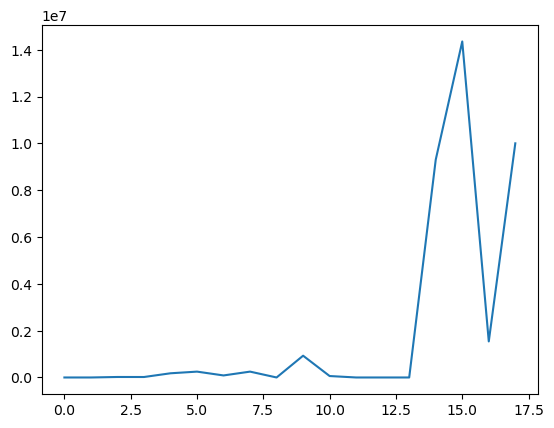

In [34]:
plt.plot(reshaped_df.index,reshaped_df["Female"])

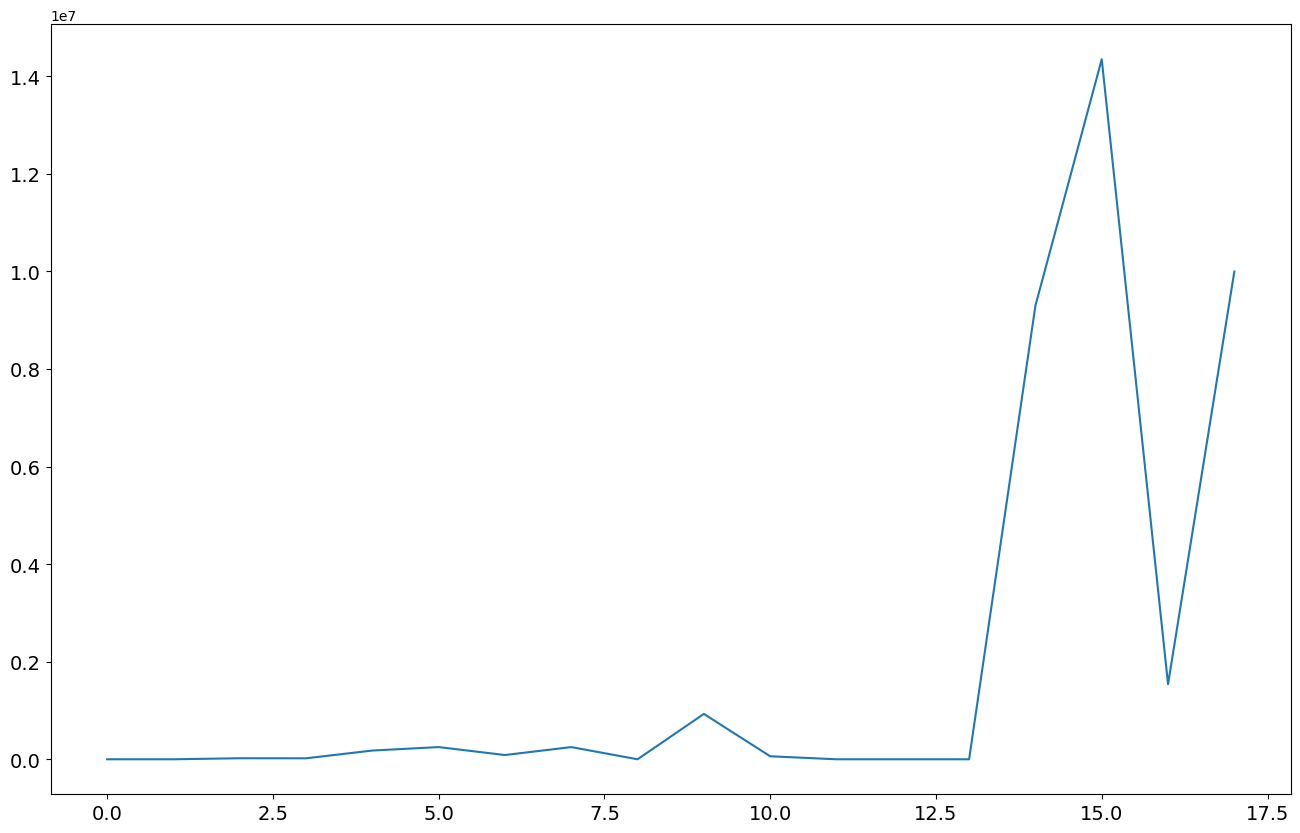

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["Female"])

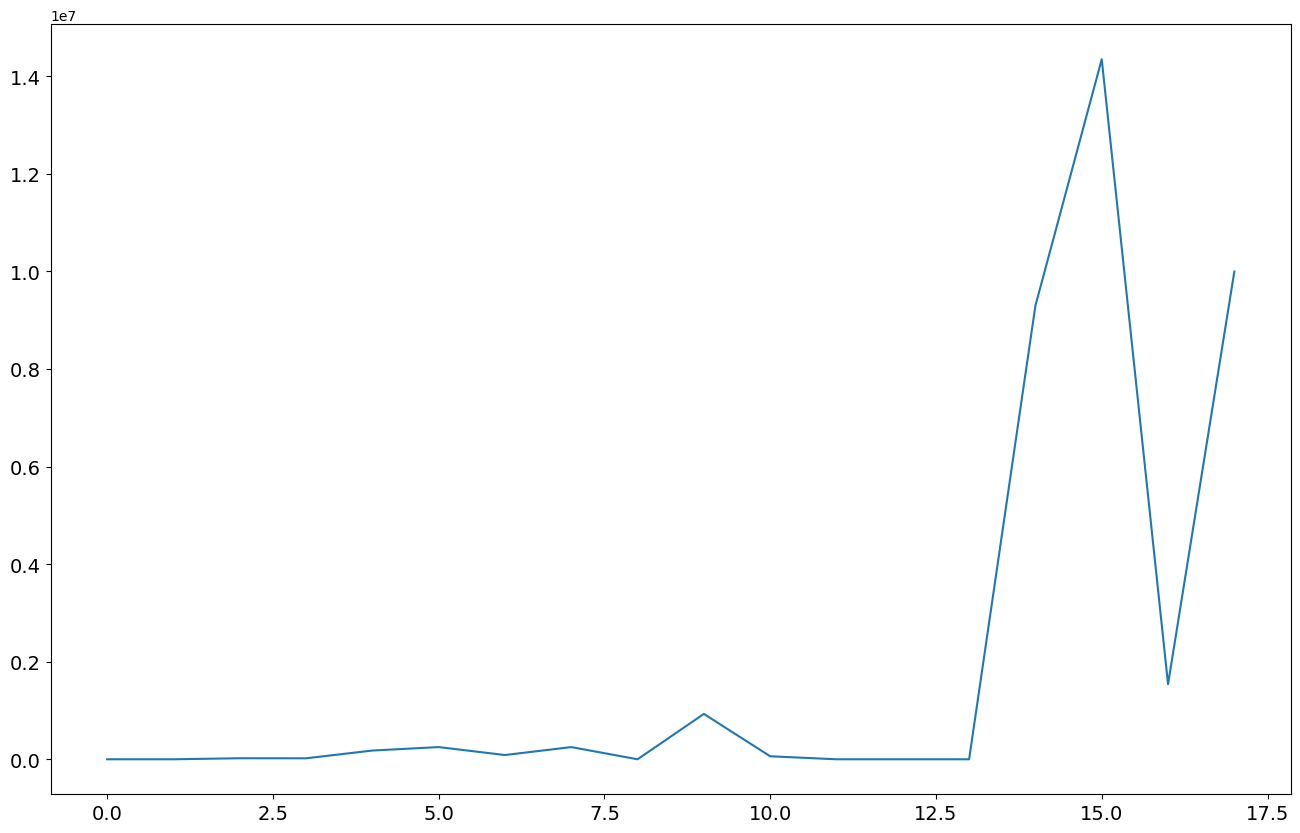

In [36]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["Female"])

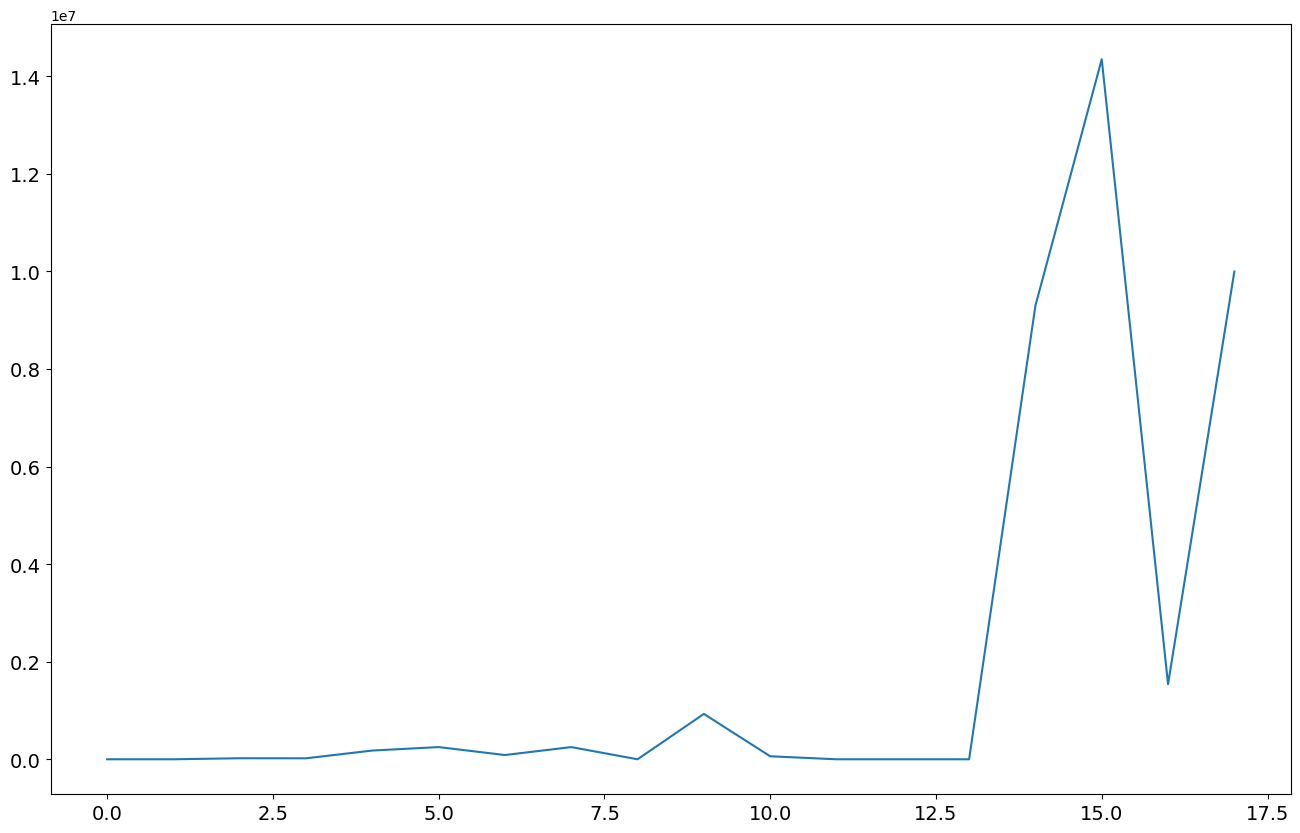

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df["Female"])

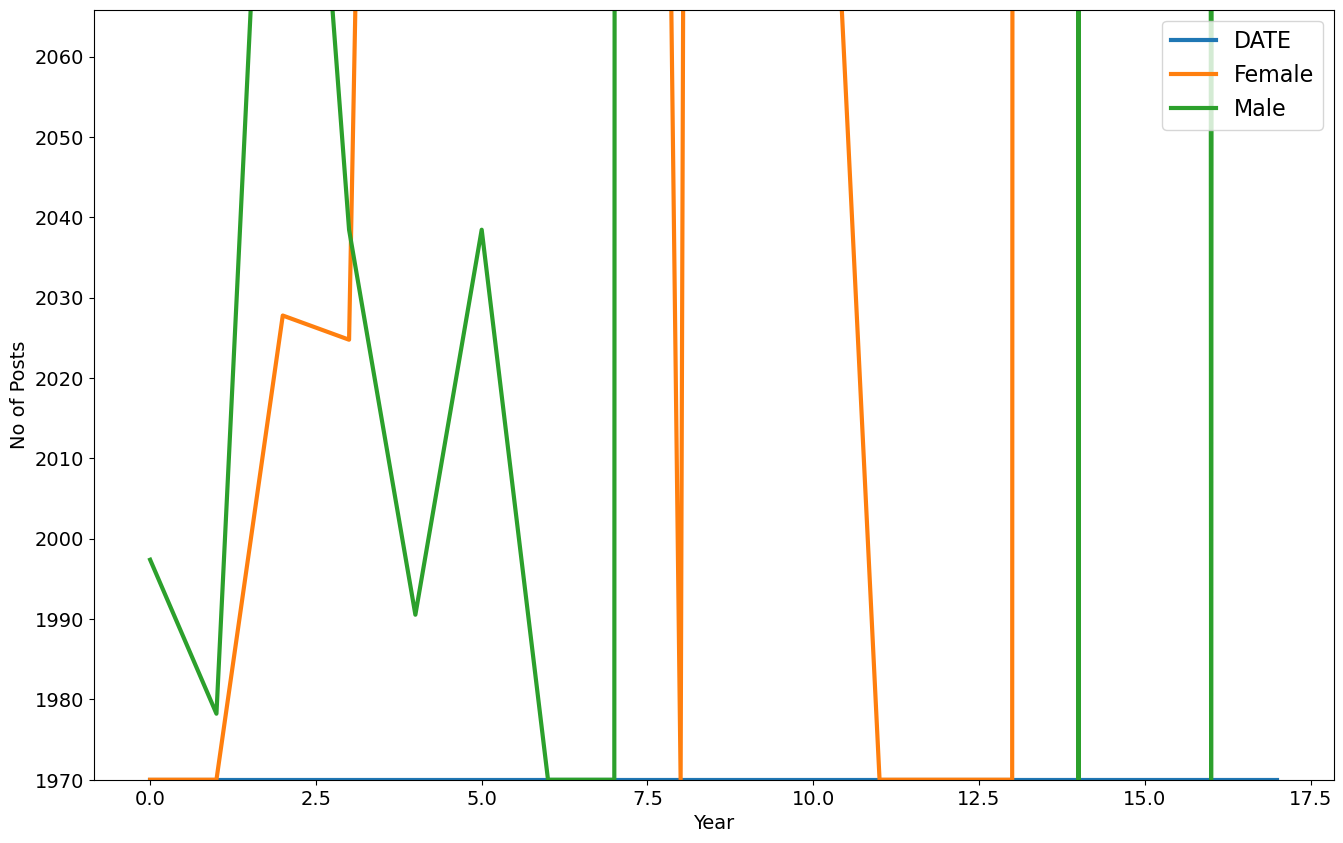

In [38]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Posts",fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],label=column,linewidth=3)
plt.legend(fontsize=16)
plt.show(block=False)

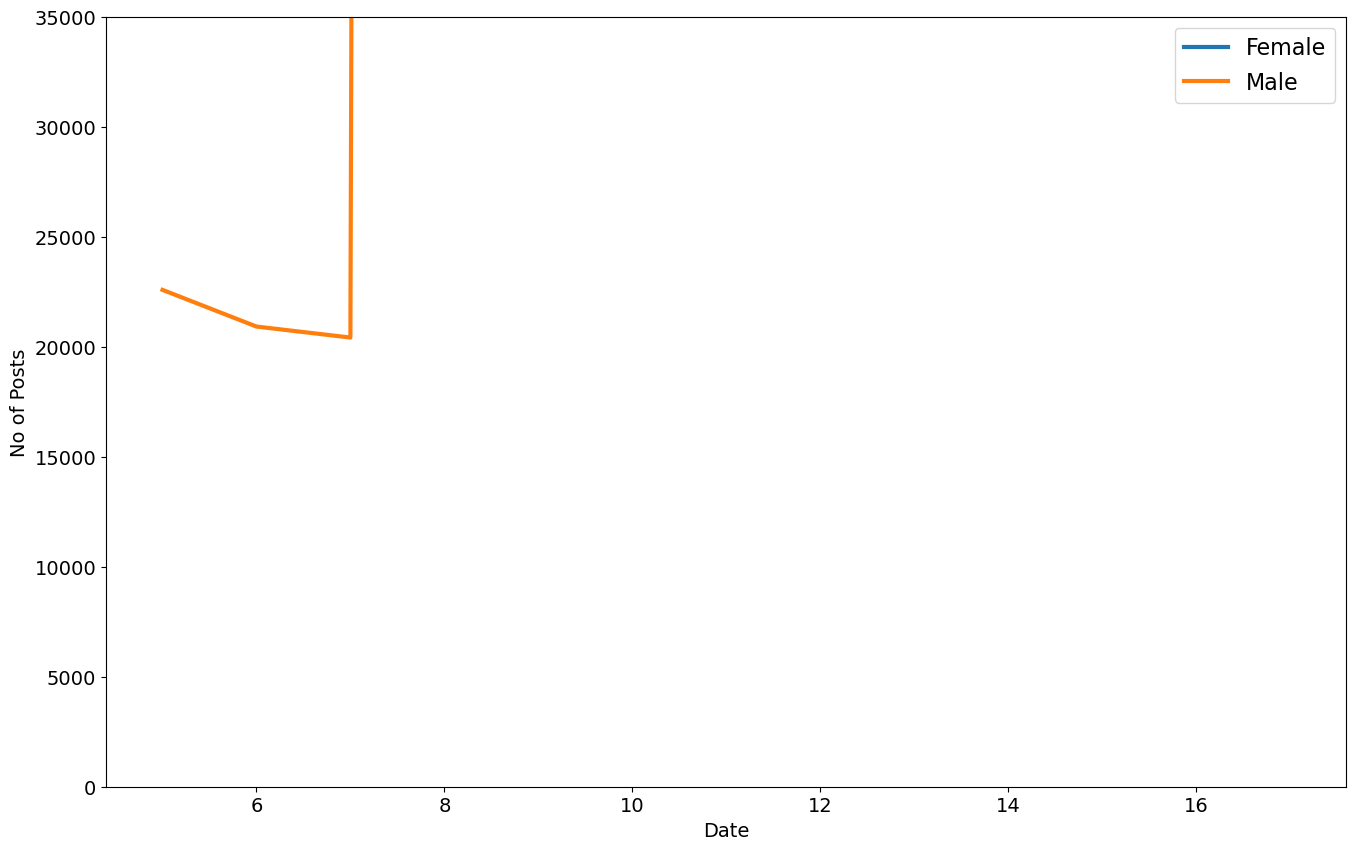

In [40]:
# Drop datetime columns or select only numeric ones
reshaped_numeric = reshaped_df.select_dtypes(include='number')

# Compute rolling mean on numeric data
rolling_df = reshaped_numeric.rolling(window=6).mean()

# Now plot
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("No of Posts", fontsize=14)
plt.ylim(0, 35000)

for column in rolling_df.columns:
    plt.plot(reshaped_df.index, rolling_df[column], label=column, linewidth=3)

plt.legend(fontsize=16)
plt.show()
